# Yoruba Language Detection

##### Final Year Project

### Importing Basic Libraries

In [1]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
df = pd.read_csv('langs.csv')
df.head()
df.shape

(28861, 2)

C:\Users\Horsars Marvel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

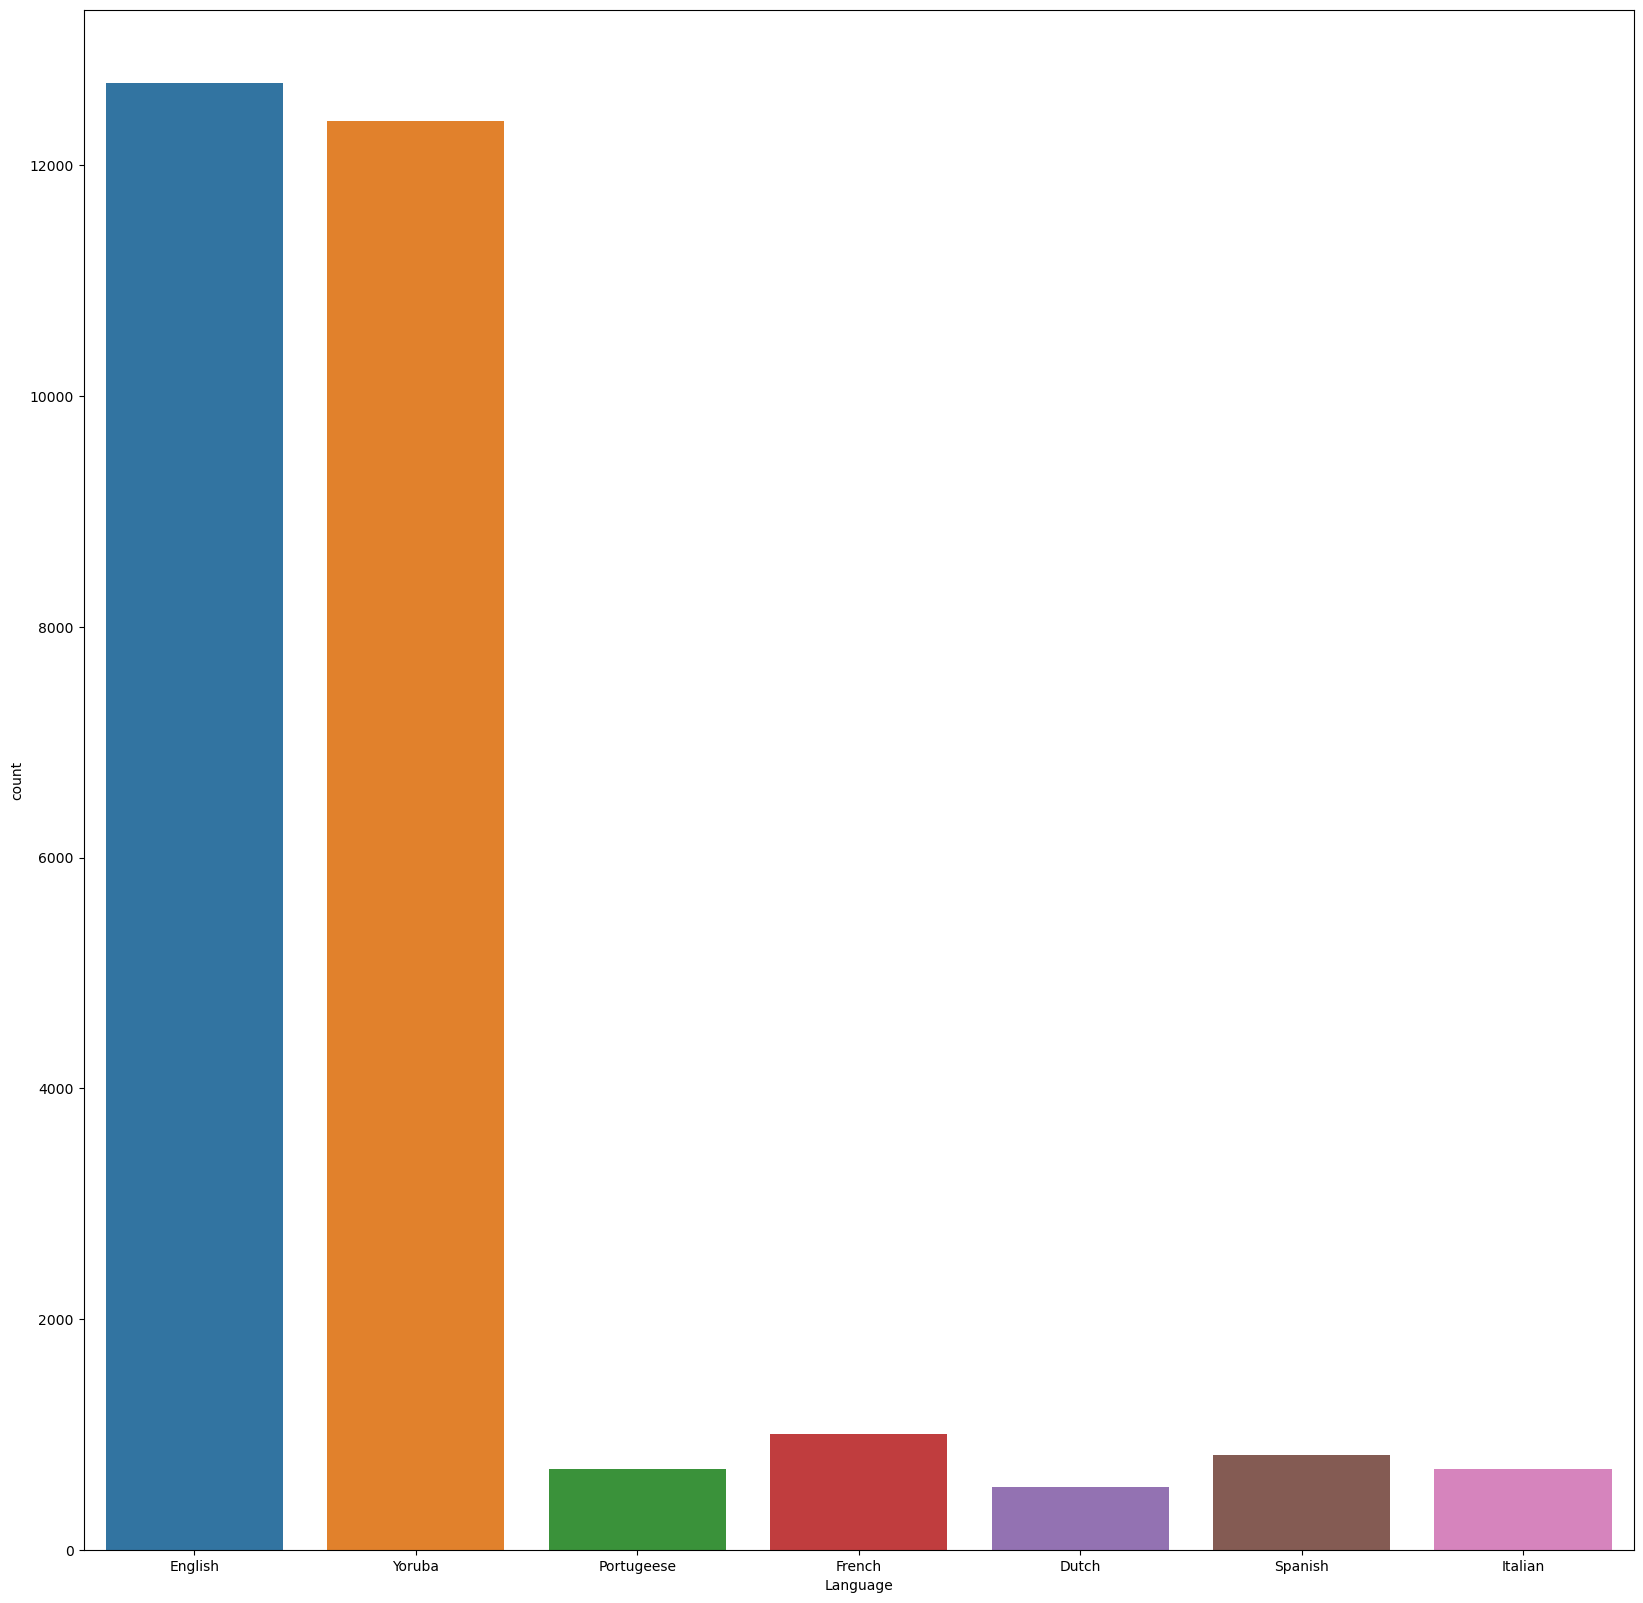

In [13]:
plt.figure(figsize=(20,20))
sns.countplot(df['Language'])

### Cleaning up the dataset, using string library 

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### A function that cleans the dataset

In [26]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
        text = text.lower()
        return(text)
        

### Trying out the function

In [6]:
remove_pun('"Nature can refer to the phenomena of the: 44##@! physical@."')

'nature can refer to the phenomena of the 44 physical'

In [7]:
remove_pun('"lílo àkàbà — ǹjẹ́ o máa ń ṣe àyẹ̀wò wọ̀nyí tó lè dáàbò bò ẹ́,? re"') # => Working wellwith yoruba alphabets

'lílo àkàbà — ǹjẹ́ o máa ń ṣe àyẹ̀wò wọ̀nyí tó lè dáàbò bò ẹ́ re'

### Applying the Function on our Dataset

###### This removes every punctuation in the dataset and converts to lowercase

In [27]:
df['Text'] = df['Text'].apply(remove_pun)

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
df.head()

In [ ]:
df.shape

### Dividing datasets to train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,0] # => Assigning the Texts to X
y =df.iloc[:,1] # => Assigning the Language Column
# X
y

### Assigning test and train data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2, stratify=y)
X_train,X_test,y_train,y_test

### Converting values to computer understandable version = Encoding

###### Vectorizing the dataset

In [ ]:
from sklearn import feature_extraction

In [ ]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char') # Unigrams and bigrams
vec

In [ ]:
from sklearn import pipeline
from sklearn import linear_model

### Pipeline: creating a complete flow of functions (converting to vector and training) multpile steps

In [ ]:
model_pipe = pipeline.Pipeline([('vec',vec),('clf', linear_model.LogisticRegression())])
# model_pipe

In [ ]:
model_pipe.fit(X_train,y_train)

In [ ]:
model_pipe.classes_

In [ ]:
predict_val = model_pipe.predict(X_test)
# predict_val

# 


# Trying other Models (Multinomial NB, Random Forest, KNN)

# .................................................................................................................................

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# load the dataset
df2 = pd.read_csv("language_detection-second.csv")

# Preprocess the text by converting to a bag-of-words representation
vectorizer = TfidfVectorizer()
A = vectorizer.fit_transform(df2['Text'])

# Convert the target labels to numerical values
b = pd.factorize(df2['Language'])[0]

# Split the dataset into training and validation sets
A_train, A_val, b_train, b_val = train_test_split(A, b, test_size=0.2, random_state=42, stratify=y)



# Fit the classifier to the training data
mnb.fit(A_train, b_train)


In [ ]:
# Evaluating the performance

# Predict the language for each sample in the validation set
b_pred = mnb.predict(A_val)

# Compute the accuracy of the predictions
accuracy = accuracy_score(b_val, b_pred)
print(f'Accuracy: {accuracy:.2f}')


### Multinomial NB Result

In [ ]:
# Predict the language of new text
sampleText = 'My name is Damilola'

NBlanguage_label = mnb.predict(vectorizer.transform([sampleText]))
NBlanguage = pd.Categorical.from_codes(NBlanguage_label, df2['Language'].unique())[0]
print(f'The language of "{sampleText}" is {NBlanguage}')


# .................................................................................................................................

### Random Forest

In [ ]:
# import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# load and preprocess the dataset
df3 = pd.read_csv("language_detection-second.csv")
vectorizer = CountVectorizer(ngram_range=(1, 3), analyzer="char")
C = vectorizer.fit_transform(df3["Text"])
d = df["Language"]

# train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(C, d)

# preprocess your input
# my_input_vectorized = vectorizer.transform([my_input])

# use your model to make predictions
# predicted_language = rf.predict(my_input_vectorized)

# print the predicted output
# print("the language is" ,(predicted_language))

# Make predictions on the testing data
predictions = rf.predict(C)

# Calculate the accuracy score of the random forest classifier
accuracy = accuracy_score(d, predictions)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy*100))

### RF RESULT

In [ ]:
my_input2 = "Mofẹ́ pààrọ̀ gílóòbù iná"

# Sample text = Let's Party hard tonight, Mofẹ́ pààrọ̀ gílóòbù iná, My father is the cousin to England's present Queen

my_input_vectorized2 = vectorizer.transform([my_input2]) #= Preprocessing
predicted_language2 = rf.predict(my_input_vectorized2) #= using model

print("the language is" ,(predicted_language2))

# .................................................................................................................................

## TensorFlow

# .................................................................................................................................

### K-Nearest Neighbour model

In [ ]:
# import the important libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Load the text data into a pandas DataFrame
dataKNN = pd.read_csv('language_detection-second.csv')

# Preprocess the text by converting to a bag-of-words representation
vectorizer1 = TfidfVectorizer()
E = vectorizer1.fit_transform(dataKNN['Text'])

# Convert the target labels to numerical values
f = pd.factorize(dataKNN['Language'])[0]

# Split to test, train 
E_train, E_val, f_train, f_val = train_test_split(E, f, test_size=0.2, stratify=y)

# Initialize the KNN classifier
knn2 = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn2.fit(E_train, f_train)

# Predict the language for each sample in the validation set
f_pred = knn2.predict(E_val)



# Was having issues witht the transform(), i had to transform the text to be predicted
# checking the size of the trained data

# print(E_train.shape)
# print(E_val.shape)


# Create a dictionary that maps numerical labels to language names
label_to_language = {0: 'Yoruba', 1: 'Not Yoruba'}


# Compute the accuracy of the predictions
accuracy = sum(f_pred == f_val) / len(f_val)
print(f'Accuracy: {accuracy:.2f}')

### KNN RESULT

In [ ]:
# Predict the language of new text
predictText = 'Mofẹ́ pààrọ̀ gílóòbù iná'

# sample text = My father is the cousin to England's present Queen, Bonjour, comment allez-vous?

language_label = knn2.predict(vectorizer1.transform([predictText]))[0]
mainLanguage = label_to_language[language_label]
print(f'The language of "{predictText}" is {mainLanguage}')


# .................................................................................................................................

# 


### Calculating the Accuracy  of the main model

In [ ]:
from sklearn import metrics

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test,predict_val)*100}") 

## 

In [ ]:
metrics.confusion_matrix(y_test,predict_val)

In [ ]:
model_pipe.predict(['My name is osas']) 

In [ ]:
model_pipe.predict(['ant']) # => Wrong

In [ ]:
# if model_pipe.predict(['ílóòbù iná tó wà']) != 'Yoruba' or model_pipe.predict(['Marvelous']) != 'English':
#     error = ('Error: Not a yoruba or English text')
#     print(error)

### Saving as a pickle file

##### to be used on the web

In [ ]:
import pickle

In [ ]:
# new_file = open('model.pckl', 'wb')
new_file = open('model.pkl', 'wb')
pickle.dump(model_pipe,new_file)
new_file.close()

## Thank You!!!